# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito del proyecto es analizar y comparar el comportamiento de los clientes de las tarifas Surf y Ultimate de Megaline para determinar cuál de estas tarifas genera más ingresos. Esta información permitirá al departamento comercial de Megaline ajustar el presupuesto de publicidad de manera más efectiva, enfocándose en la tarifa que sea más rentable para la empresa. Se realizará la carga y exploración de datos, asi como un análisis descriptivo,
un cálculo de ingresos, visualización de datos y finalmente sacaremos conclusiones y recomendaciones

## Inicialización

In [1]:
from scipy import stats as st
from math import factorial
import pandas as pd
import seaborn as sns
import numpy as np
import math as mt
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv ('/datasets/megaline_calls.csv')

internet = pd.read_csv('/datasets/megaline_internet.csv')

messages = pd.read_csv('/datasets/megaline_messages.csv') 

plans = pd.read_csv('/datasets/megaline_plans.csv') 

user = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

In [3]:
# Exploración inicial de los datos
print(calls.info())
print(internet.info())
print(messages.info())
print(plans.info())
print(user.info())

# Imprimir una muestra de los datos
print(calls.head())
print(internet.head())
print(messages.head())
print(plans.head())
print(user.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null 

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas

plans.mean()

messages_included          525.00
mb_per_month_included    23040.00
minutes_included          1750.00
usd_monthly_pay             45.00
usd_per_gb                   8.50
usd_per_message              0.02
usd_per_minute               0.02
dtype: float64

El DataFrame de 2 filas y 8 columnas no tiene valores nulos y presenta tipos de datos adecuados. Las medias de las tarifas indican 525 mensajes, 23040 MB (23 GB), 1750 minutos, un pago mensual promedio de $45, un costo promedio de $8.50 por GB, $0.02 por mensaje y $0.02 por minuto. No hay problemas con los tipos de datos ni datos ausentes, pero el tamaño de la muestra es demasiado pequeño para un análisis estadístico significativo. Se recomienda aumentar el tamaño de la muestra y verificar su representatividad para obtener resultados más precisos y realizar análisis adicionales.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [6]:
# Verificar y corregir datos nulos, si los hubiera

print(plans.isnull().sum())
print(plans.duplicated().sum())

# Verificar tipos de datos y convertir si es necesario

print(plans.dtypes)

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
0
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

El marco de datos de Precios (Planes) no requiere que se agregue elementos ni realice modificaciones en función de la información proporcionada.
Esto se debe a que  ya contiene toda la información relevante sobre  el  plan, y como no hay valores nulos ni duplicados y el tipo de datos es correcto.
Por lo tanto, no se requieren modificaciones ni mejoras adicionales en este DataFrame.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

user.mean()

user_id    1249.500
age          45.486
dtype: float64

User cuenta con 34 registros, sugiriendo una muestra relativamente pequeña de usuarios. Los tipos de datos son: user_id (int64), first_name (object), last_name (object), age (int64), city (object), reg_date (object), plan (object), y churn_date (object). Las columnas user_id y age tienen tipos de datos adecuados, mientras que reg_date y churn_date deberían ser de tipo datetime para facilitar el análisis temporal. No hay valores nulos en ninguna de las columnas, lo cual es positivo ya que no se requiere imputación de datos faltantes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
user['reg_date'] = pd.to_datetime(user['reg_date'])
user['churn_date'] = pd.to_datetime(user['churn_date'])
print(user.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# Encontrar la última fecha presente en los datos (en 'reg_date' y 'churn_date')
last_date = max(user['reg_date'].max(), user['churn_date'].max())

# Crear una columna de duración de la suscripción
user['duration'] = (user['churn_date'].fillna(last_date) - user['reg_date']).dt.days

# Crear una columna de estado de la suscripción
user['is_active'] = user['churn_date'].isna()

# Mostrar la información del DataFrame enriquecido
print(user.info())
print(user.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   duration    500 non-null    int64         
 9   is_active   500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(3), object(4)
memory usage: 35.8+ KB
None
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MS

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
calls.mean()

id                  inf
user_id     1247.658046
duration       6.745927
dtype: float64


La información general del DataFrame calls muestra 137735 entradas y 4 columnas (id, user_id, call_date, duration). Los tipos de datos son: id (objeto), user_id (entero), call_date (objeto) y duration (flotante). La media impresa muestra valores para user_id (1247.658046) y duration (6.745927), pero id resulta en inf, lo cual es incorrecto porque es una cadena de texto. Se observa que call_date debe convertirse a datetime para mejor manipulación, y no se identifican datos ausentes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
# Convertir la columna 'call_date' a tipo datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Verificar los cambios realizados
print(calls.info())

# Imprimir una muestra de los datos para verificar las conversiones
print(calls.head())

# Calcular la media excluyendo la columna 'id'
calls_mean = calls[['user_id', 'duration']].mean()
print(calls_mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22
user_id     1247.658046
duration       6.745927
dtype: float64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Agregar una columna de mes
calls['month'] = calls['call_date'].dt.month

# Redondear la duración de las llamadas al minuto más cercano
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)

# Verificar los cambios realizados
print(calls.info())
print(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB
None
         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27         9     12
1  1000_145     1000 2018-12-27        14     12
2  1000_247     1000 2018-12-27        15     12
3  1000_309     1000 2018-12-28         6     12
4  1000_380     1000 2018-12-30         5     12


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes

messages.mean()

id                 inf
user_id    1245.972768
dtype: float64

La información general del DataFrame messages muestra 76051 entradas y 3 columnas (id, user_id, message_date), con tipos de datos: id (objeto), user_id (entero) y message_date (objeto). La media impresa muestra valores para user_id (1245.972768), pero id resulta en inf, ya que es una cadena de texto. Se observa que message_date debería convertirse a datetime para una mejor manipulación, y no se identifican datos ausentes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
# Convertir la columna 'message_date' a tipo datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Verificar los cambios realizados
print(messages.info())

# Imprimir una muestra de los datos para verificar las conversiones
print(messages.head())

# Calcular la media excluyendo la columna 'id'
messages_mean = messages[['user_id']].mean()
print(messages_mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
user_id    1245.972768
dtype: float64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
# Agregar una columna de mes
messages['month'] = messages['message_date'].dt.month

# Verificar los cambios realizados
print(messages.info())
print(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB
None
         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet

internet.mean()

id                 inf
user_id    1242.496361
mb_used     366.713701
dtype: float64

La información general del DataFrame internet muestra 104825 entradas y 4 columnas (id, user_id, session_date, mb_used), con tipos de datos: id (objeto), user_id (entero), session_date (objeto) y mb_used (flotante). La media impresa muestra valores para user_id (1242.496361) y mb_used (366.713701), pero id resulta en inf, ya que es una cadena de texto. Se observa que session_date debería convertirse a datetime para una mejor manipulación, y no se identifican datos ausentes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
# Convertir la columna 'session_date' a tipo datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Verificar los cambios realizados
print(internet.info())

# Imprimir una muestra de los datos para verificar las conversiones
print(internet.head())

# Calcular la media excluyendo la columna 'id'
internet_mean = internet[['user_id', 'mb_used']].mean()
print(internet_mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
user_id    1242.496361
mb_used     366.713701
dtype: float64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
# Convertir la columna 'session_date' a tipo datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Agregar una columna de mes
internet['month'] = internet['session_date'].dt.month

# Verificar los cambios realizados
print(internet.info())
print(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB
None
         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12
3  1000_413     1000   2018-12-26   270.99     12
4  1000_442     1000   2018-12-27   880.22     12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_month = calls.groupby(['user_id', 'month']).size().reset_index(name='num_calls')

# Verificar el resultado
print(calls_per_user_month.head())

   user_id  month  num_calls
0     1000     12         16
1     1001      8         27
2     1001      9         49
3     1001     10         65
4     1001     11         64


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

# Verificar el resultado
print(minutes_per_user_month.head())

   user_id  month  total_minutes
0     1000     12            124
1     1001      8            182
2     1001      9            315
3     1001     10            393
4     1001     11            426


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_month = messages.groupby(['user_id', 'month']).size().reset_index(name='num_messages')

# Verificar el resultado
print(messages_per_user_month.head())

   user_id  month  num_messages
0     1000     12            11
1     1001      8            30
2     1001      9            44
3     1001     10            53
4     1001     11            36


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Agrupar los datos por usuario y mes y sumar el total de megabytes usados
internet_per_user_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb_used')
# Transformar los megabytes a gigabytes
internet_per_user_month['total_gb_used'] = internet_per_user_month['total_mb_used'] / 1024
# Aproximar los gigabytes al entero superior
internet_per_user_month['total_gb_used'] = np.ceil(internet_per_user_month['total_gb_used']).astype(int)
# Verificar el resultado
print(internet_per_user_month.head())
print(internet_per_user_month.info())

   user_id  month  total_mb_used  total_gb_used
0     1000     12        1901.47              2
1     1001      8        6919.15              7
2     1001      9       13314.82             14
3     1001     10       22330.49             22
4     1001     11       18504.30             19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2277 non-null   int64  
 1   month          2277 non-null   int64  
 2   total_mb_used  2277 non-null   float64
 3   total_gb_used  2277 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 71.3 KB
None


In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_minutes = pd.merge(calls_per_user_month, minutes_per_user_month, on=['user_id', 'month'], how='outer')

# Fusionar los datos anteriores con los datos de mensajes
calls_minutes_messages = pd.merge(calls_minutes, messages_per_user_month, on=['user_id', 'month'], how='outer')

# Fusionar los datos anteriores con los datos de Internet
final_data = pd.merge(calls_minutes_messages, internet_per_user_month, on=['user_id', 'month'], how='outer')

# Verificar el resultado
print(final_data.info())
print(final_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2293 non-null   int64  
 2   num_calls      2258 non-null   float64
 3   total_minutes  2258 non-null   float64
 4   num_messages   1806 non-null   float64
 5   total_mb_used  2277 non-null   float64
 6   total_gb_used  2277 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB
None
   user_id  month  num_calls  total_minutes  num_messages  total_mb_used  \
0     1000     12       16.0          124.0          11.0        1901.47   
1     1001      8       27.0          182.0          30.0        6919.15   
2     1001      9       49.0          315.0          44.0       13314.82   
3     1001     10       65.0          393.0          53.0       22330.49   
4     1001     11       64.0          426.0          36.0    

In [29]:
# Añade la información de la tarifa
# Fusionar el DataFrame 'final_data' con el DataFrame 'user' para añadir las columnas 'plan' y 'city'
final_data_with_plan_city = pd.merge(final_data, user[['user_id', 'plan', 'city']], on='user_id', how='left')

# Fusionar el DataFrame 'final_data_with_plan_city' con el DataFrame 'plans' para añadir los detalles de la tarifa
final_data_complete = pd.merge(final_data_with_plan_city, plans, left_on='plan', right_on='plan_name', how='left')

# Verificar el resultado
print(final_data_complete.info())
print(final_data_complete.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   num_calls              2258 non-null   float64
 3   total_minutes          2258 non-null   float64
 4   num_messages           1806 non-null   float64
 5   total_mb_used          2277 non-null   float64
 6   total_gb_used          2277 non-null   float64
 7   plan                   2293 non-null   object 
 8   city                   2293 non-null   object 
 9   messages_included      2293 non-null   int64  
 10  mb_per_month_included  2293 non-null   int64  
 11  minutes_included       2293 non-null   int64  
 12  usd_monthly_pay        2293 non-null   int64  
 13  usd_per_gb             2293 non-null   int64  
 14  usd_per_message        2293 non-null   float64
 15  usd_

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
# Asegurarse de que los datos necesarios están presentes en 'final_data_complete'
# Calcular los excesos de uso
final_data_complete['excess_minutes'] = final_data_complete['total_minutes'] - final_data_complete['minutes_included']
final_data_complete['excess_messages'] = final_data_complete['num_messages'] - final_data_complete['messages_included']
final_data_complete['excess_mb'] = final_data_complete['total_mb_used'] - final_data_complete['mb_per_month_included']

# Convertir el exceso de datos a GB (1 GB = 1024 MB)
final_data_complete['excess_gb'] = final_data_complete['excess_mb'] / 1024

# Reemplazar valores negativos por 0 (no hay cargos adicionales si no hay exceso)
final_data_complete['excess_minutes'] = final_data_complete['excess_minutes'].apply(lambda x: max(x, 0))
final_data_complete['excess_messages'] = final_data_complete['excess_messages'].apply(lambda x: max(x, 0))
final_data_complete['excess_gb'] = final_data_complete['excess_gb'].apply(lambda x: max(x, 0))

# Calcular los cargos por excesos
final_data_complete['charges_minutes'] = final_data_complete['excess_minutes'] * final_data_complete['usd_per_minute']
final_data_complete['charges_messages'] = final_data_complete['excess_messages'] * final_data_complete['usd_per_message']
final_data_complete['charges_gb'] = final_data_complete['excess_gb'] * final_data_complete['usd_per_gb']

# Calcular el ingreso total
final_data_complete['total_income'] = final_data_complete['usd_monthly_pay'] + final_data_complete['charges_minutes'] + final_data_complete['charges_messages'] + final_data_complete['charges_gb']

# Verificar el resultado
print(final_data_complete[['user_id', 'month', 'total_income']].head())

   user_id  month  total_income
0     1000     12     70.000000
1     1001      8     20.000000
2     1001      9     20.000000
3     1001     10     88.161191
4     1001     11     50.706055


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

   plan  month  avg_duration
0  surf      1        203.00
1  surf      2        297.00
2  surf      3        330.00
3  surf      4        351.54
4  surf      5        410.24


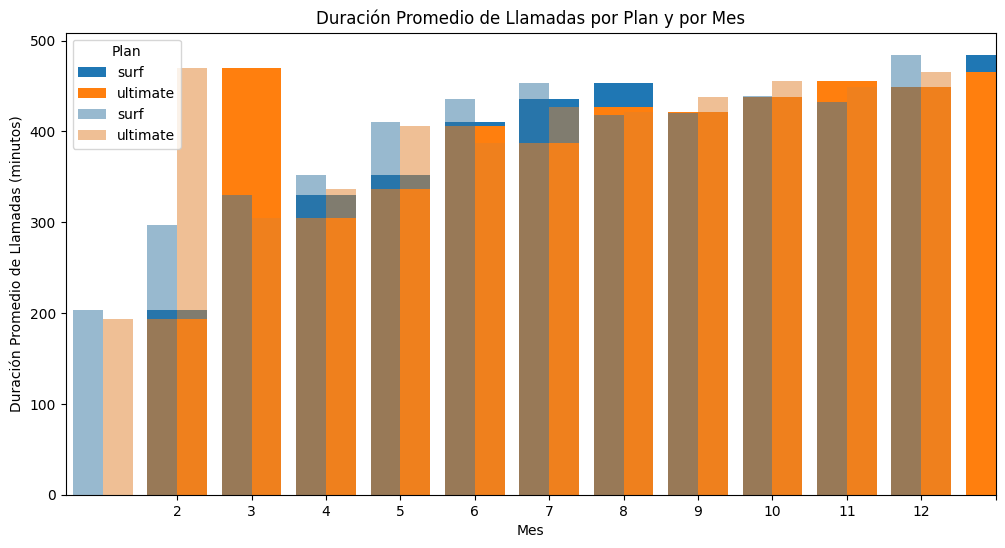

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Agrupar los datos por plan y por mes y calcular la duración promedio de llamadas
avg_call_duration = final_data_complete.groupby(['plan', 'month'])['total_minutes'].mean().reset_index(name='avg_duration')

# Verificar el resultado
print(avg_call_duration.head())

# Crear un gráfico de barras para visualizar la duración promedio de llamadas por plan y por mes
plt.figure(figsize=(12, 6))

# Agrupar los datos por plan para trazar barras separadas para cada plan
plans = avg_call_duration['plan'].unique()
for plan in plans:
    plan_data = avg_call_duration[avg_call_duration['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['avg_duration'], label=plan)

# Usar Seaborn para crear un gráfico de barras
sns.barplot(x='month', y='avg_duration', hue='plan', data=avg_call_duration, alpha=0.5)

# Añadir títulos y etiquetas
plt.title('Duración Promedio de Llamadas por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.legend(title='Plan')
plt.xticks(range(1, 13))  # Asegurarse de que todos los meses están representados

# Mostrar el gráfico
plt.show()

   user_id  month  num_calls  total_minutes  num_messages  total_mb_used  \
0     1000     12       16.0          124.0          11.0        1901.47   
1     1001      8       27.0          182.0          30.0        6919.15   
2     1001      9       49.0          315.0          44.0       13314.82   
3     1001     10       65.0          393.0          53.0       22330.49   
4     1001     11       64.0          426.0          36.0       18504.30   

   total_gb_used      plan                                   city  \
0            2.0  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA   
1            7.0      surf        Seattle-Tacoma-Bellevue, WA MSA   
2           14.0      surf        Seattle-Tacoma-Bellevue, WA MSA   
3           22.0      surf        Seattle-Tacoma-Bellevue, WA MSA   
4           19.0      surf        Seattle-Tacoma-Bellevue, WA MSA   

   messages_included  ...  usd_per_minute  plan_name  excess_minutes  \
0               1000  ...            0.01   ultimate    

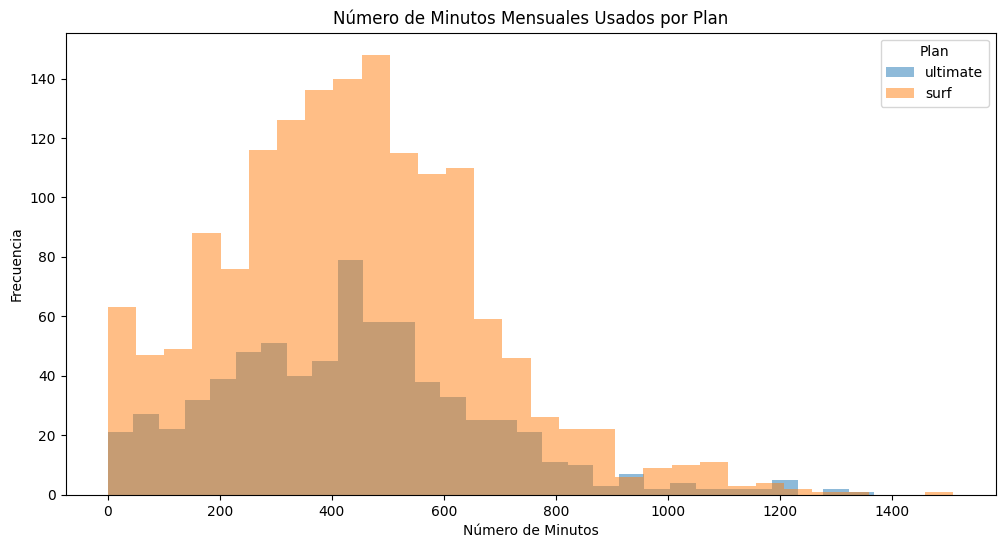

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Verificar las primeras filas del DataFrame
print(final_data_complete.head())

# Crear un gráfico de histograma para visualizar el número de minutos mensuales usados por los usuarios de cada plan
plt.figure(figsize=(12, 6))

# Filtrar los datos por cada plan
plans = final_data_complete['plan'].unique()
for plan in plans:
    plan_data = final_data_complete[final_data_complete['plan'] == plan]
    plt.hist(plan_data['total_minutes'], bins=30, alpha=0.5, label=plan)

# Añadir títulos y etiquetas
plt.title('Número de Minutos Mensuales Usados por Plan')
plt.xlabel('Número de Minutos')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')

# Mostrar el gráfico
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Agrupar los datos por plan y por mes y calcular la duración promedio de llamadas
grouped_data = final_data_complete.groupby(['plan', 'month'])['total_minutes']

# Calcular la media y la varianza de la duración mensual de llamadas por plan
mean_duration = grouped_data.mean().reset_index(name='mean_duration')
variance_duration = grouped_data.var().reset_index(name='variance_duration')

# Fusionar las medias y varianzas en un solo DataFrame
stats_duration = pd.merge(mean_duration, variance_duration, on=['plan', 'month'])

# Verificar el resultado
print(stats_duration.head())

   plan  month  mean_duration  variance_duration
0  surf      1         203.00       15842.000000
1  surf      2         297.00       52226.500000
2  surf      3         330.00       35809.363636
3  surf      4         351.54       50866.743265
4  surf      5         410.24       56938.779459


   user_id  month  num_calls  total_minutes  num_messages  total_mb_used  \
0     1000     12       16.0          124.0          11.0        1901.47   
1     1001      8       27.0          182.0          30.0        6919.15   
2     1001      9       49.0          315.0          44.0       13314.82   
3     1001     10       65.0          393.0          53.0       22330.49   
4     1001     11       64.0          426.0          36.0       18504.30   

   total_gb_used      plan                                   city  \
0            2.0  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA   
1            7.0      surf        Seattle-Tacoma-Bellevue, WA MSA   
2           14.0      surf        Seattle-Tacoma-Bellevue, WA MSA   
3           22.0      surf        Seattle-Tacoma-Bellevue, WA MSA   
4           19.0      surf        Seattle-Tacoma-Bellevue, WA MSA   

   messages_included  ...  usd_per_minute  plan_name  excess_minutes  \
0               1000  ...            0.01   ultimate    

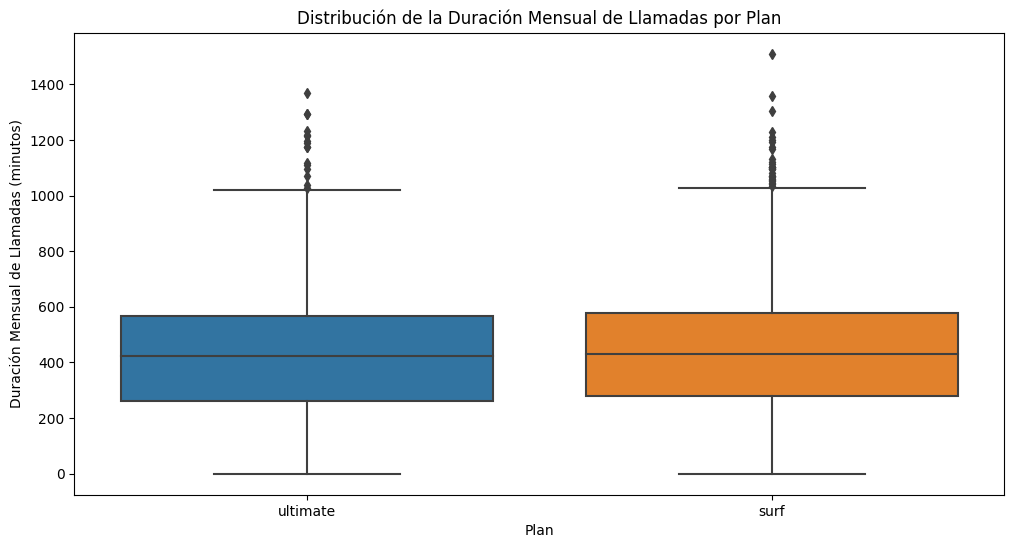

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Verificar las primeras filas del DataFrame
print(final_data_complete.head())

# Crear un diagrama de caja para visualizar la distribución de la duración mensual de llamadas por plan
plt.figure(figsize=(12, 6))

sns.boxplot(x='plan', y='total_minutes', data=final_data_complete)

# Añadir títulos y etiquetas
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración Mensual de Llamadas (minutos)')

# Mostrar el gráfico
plt.show()

El comportamiento de los usuarios varía significativamente según el plan de llamadas. Los usuarios del plan Ultimate tienden a usar más minutos mensuales y muestran mayor variabilidad en su uso, incentivados por límites más altos y tarifas adicionales más bajas. En contraste, los usuarios del plan Surf tienen un uso más moderado y consistente, reflejando los límites más bajos y tarifas adicionales más altas de su plan. En general, los usuarios adaptan su comportamiento de llamadas en función de los beneficios y costos de su plan de suscripción.

### Mensajes

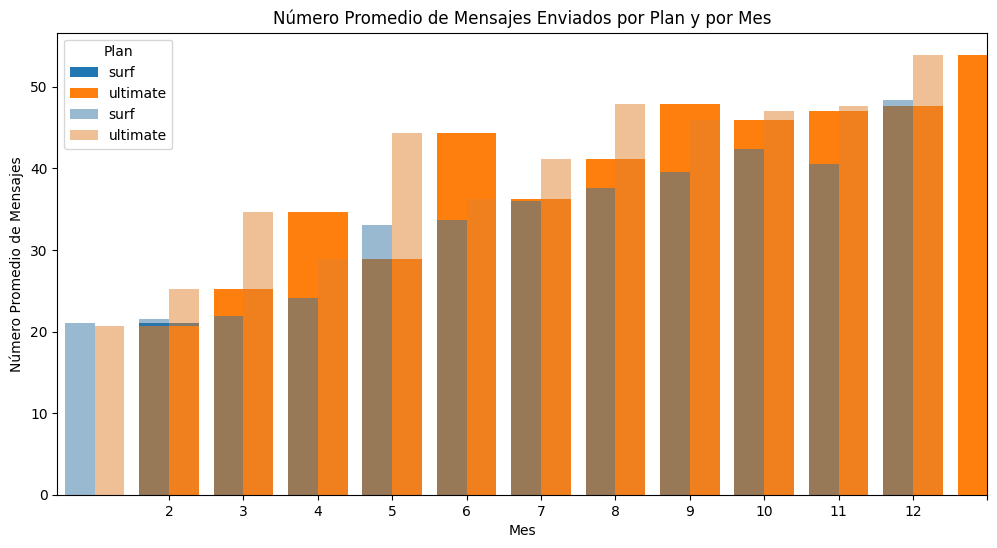

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Agrupar los datos por plan y por mes y calcular el número promedio de mensajes
avg_messages = final_data_complete.groupby(['plan', 'month'])['num_messages'].mean().reset_index(name='avg_messages')

# Crear un gráfico de barras para visualizar el número promedio de mensajes por plan y por mes
plt.figure(figsize=(12, 6))

# Agrupar los datos por plan para trazar barras separadas para cada plan
plans = avg_messages['plan'].unique()
for plan in plans:
    plan_data = avg_messages[avg_messages['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['avg_messages'], label=plan)

# Usar Seaborn para crear un gráfico de barras con transparencia
sns.barplot(x='month', y='avg_messages', hue='plan', data=avg_messages, alpha=0.5)

# Añadir títulos y etiquetas
plt.title('Número Promedio de Mensajes Enviados por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Número Promedio de Mensajes')
plt.legend(title='Plan')
plt.xticks(range(1, 13))  # Asegurarse de que todos los meses están representados

# Mostrar el gráfico
plt.show()

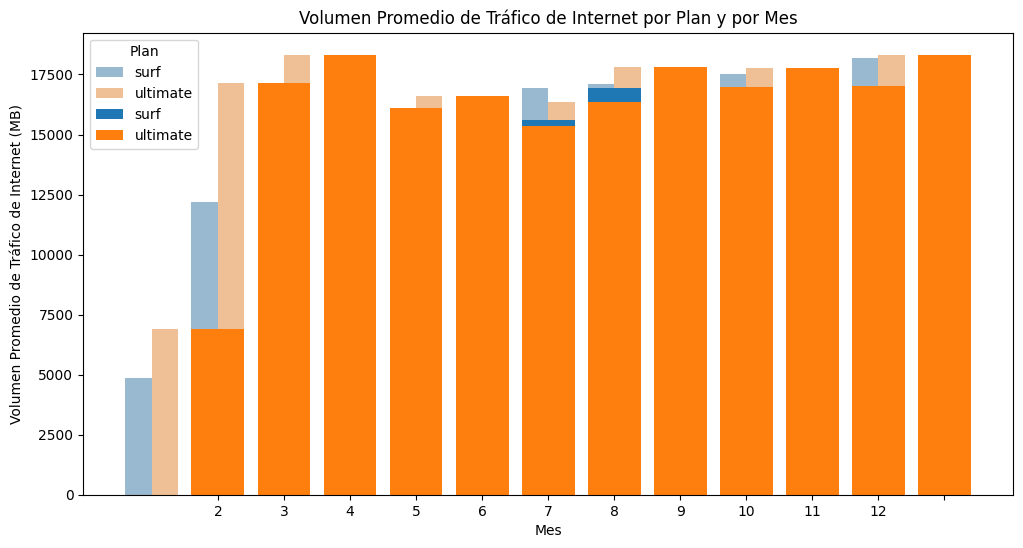

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Agrupar los datos por plan y por mes y calcular el volumen promedio de tráfico de Internet
avg_internet = final_data_complete.groupby(['plan', 'month'])['total_mb_used'].mean().reset_index(name='avg_mb_used')

# Crear un gráfico de barras para visualizar el volumen promedio de tráfico de Internet por plan y por mes
plt.figure(figsize=(12, 6))

# Usar Seaborn para crear un gráfico de barras con transparencia
sns.barplot(x='month', y='avg_mb_used', hue='plan', data=avg_internet, alpha=0.5)

# Agrupar los datos por plan para trazar barras separadas para cada plan
plans = avg_internet['plan'].unique()
for plan in plans:
    plan_data = avg_internet[avg_internet['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['avg_mb_used'], label=plan)

# Añadir títulos y etiquetas
plt.title('Volumen Promedio de Tráfico de Internet por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Volumen Promedio de Tráfico de Internet (MB)')
plt.legend(title='Plan')
plt.xticks(range(1, 13))  # Asegurarse de que todos los meses están representados

# Mostrar el gráfico
plt.show()

In [37]:
# Calcular la media y la varianza del número de mensajes enviados por cada usuario por plan y por mes
mean_messages = final_data_complete.groupby(['plan', 'month'])['num_messages'].mean().reset_index(name='mean_messages')
variance_messages = final_data_complete.groupby(['plan', 'month'])['num_messages'].var().reset_index(name='variance_messages')

# Fusionar las medias y varianzas en un solo DataFrame
stats_messages = pd.merge(mean_messages, variance_messages, on=['plan', 'month'])

# Verificar el resultado
print(stats_messages.head())

# Calcular la media y la varianza general del número de mensajes enviados por plan
mean_messages_overall = final_data_complete.groupby('plan')['num_messages'].mean().reset_index(name='mean_messages')
variance_messages_overall = final_data_complete.groupby('plan')['num_messages'].var().reset_index(name='variance_messages')

# Fusionar las medias y varianzas generales en un solo DataFrame
stats_messages_overall = pd.merge(mean_messages_overall, variance_messages_overall, on='plan')

# Verificar el resultado
print(stats_messages_overall)

   plan  month  mean_messages  variance_messages
0  surf      1      21.000000                NaN
1  surf      2      21.600000         512.800000
2  surf      3      21.937500         352.062500
3  surf      4      24.166667         534.028571
4  surf      5      33.017857         867.945130
       plan  mean_messages  variance_messages
0      surf      40.109656        1091.344231
1  ultimate      46.296233        1085.183108


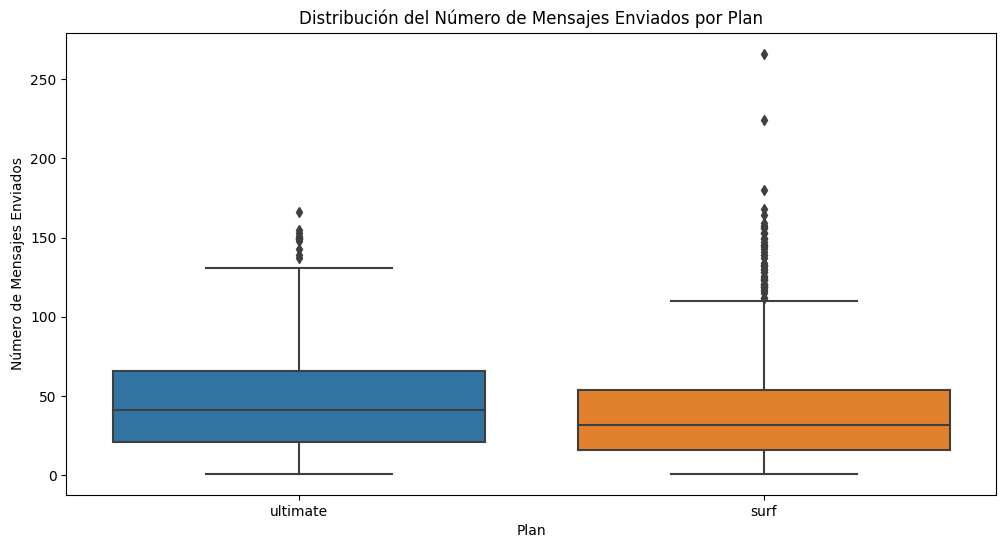

In [38]:
# Crear un diagrama de caja para visualizar la distribución del número de mensajes enviados por plan
plt.figure(figsize=(12, 6))

sns.boxplot(x='plan', y='num_messages', data=final_data_complete)

# Añadir títulos y etiquetas
plt.title('Distribución del Número de Mensajes Enviados por Plan')
plt.xlabel('Plan')
plt.ylabel('Número de Mensajes Enviados')

# Mostrar el gráfico
plt.show()

Los usuarios del plan Ultimate envían significativamente más mensajes mensuales que los del plan Surf, debido a que Ultimate incluye más mensajes y tiene tarifas adicionales más bajas. La media y la varianza del número de mensajes enviados son mayores para Ultimate, indicando mayor uso y variabilidad. Los diagramas de caja muestran una distribución más amplia y más valores atípicos para Ultimate. En resumen, el comportamiento de envío de mensajes varía según el plan, con los usuarios de Ultimate mostrando un uso más intensivo y diverso.

### Internet

   month  total_mb_used
0      1       37422.09
1      2      229511.25
2      3      526803.34
3      4      937764.90
4      5     1555209.32


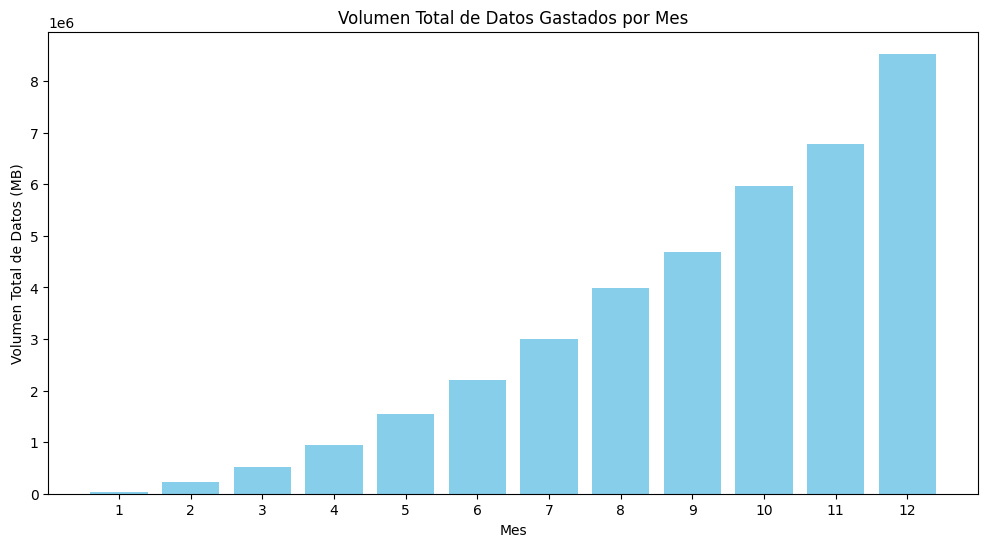

In [39]:
# Compara volumen de datos gastados por cada mes. Traza un gráfico de barras para visualizarla.
# Agrupar los datos por mes y calcular el volumen total de datos gastados
total_data_per_month = final_data_complete.groupby('month')['total_mb_used'].sum().reset_index(name='total_mb_used')

# Verificar el resultado
print(total_data_per_month.head())

# Crear un gráfico de barras para visualizar el volumen de datos gastados por mes
plt.figure(figsize=(12, 6))

plt.bar(total_data_per_month['month'], total_data_per_month['total_mb_used'], color='skyblue')

# Añadir títulos y etiquetas
plt.title('Volumen Total de Datos Gastados por Mes')
plt.xlabel('Mes')
plt.ylabel('Volumen Total de Datos (MB)')
plt.xticks(range(1, 13))  # Asegurarse de que todos los meses están representados

# Mostrar el gráfico
plt.show()

In [40]:
# Calcular la media y la varianza del volumen de tráfico de Internet por cada usuario por plan y por mes
mean_internet = final_data_complete.groupby(['plan', 'month'])['total_mb_used'].mean().reset_index(name='mean_mb_used')
variance_internet = final_data_complete.groupby(['plan', 'month'])['total_mb_used'].var().reset_index(name='variance_mb_used')

# Fusionar las medias y varianzas en un solo DataFrame
stats_internet = pd.merge(mean_internet, variance_internet, on=['plan', 'month'])

# Verificar el resultado
print(stats_internet.head())

# Calcular la media y la varianza general del volumen de tráfico de Internet por plan
mean_internet_overall = final_data_complete.groupby('plan')['total_mb_used'].mean().reset_index(name='mean_mb_used')
variance_internet_overall = final_data_complete.groupby('plan')['total_mb_used'].var().reset_index(name='variance_mb_used')

# Fusionar las medias y varianzas generales en un solo DataFrame
stats_internet_overall = pd.merge(mean_internet_overall, variance_internet_overall, on='plan')

# Verificar el resultado
print(stats_internet_overall)

   plan  month  mean_mb_used  variance_mb_used
0  surf      1   4874.860000      1.823995e+07
1  surf      2  12178.843333      4.367296e+07
2  surf      3  13345.440000      6.824556e+07
3  surf      4  12228.778571      5.722187e+07
4  surf      5  14119.728026      5.967252e+07
       plan  mean_mb_used  variance_mb_used
0      surf  16717.702137      6.216823e+07
1  ultimate  17238.642253      6.132485e+07


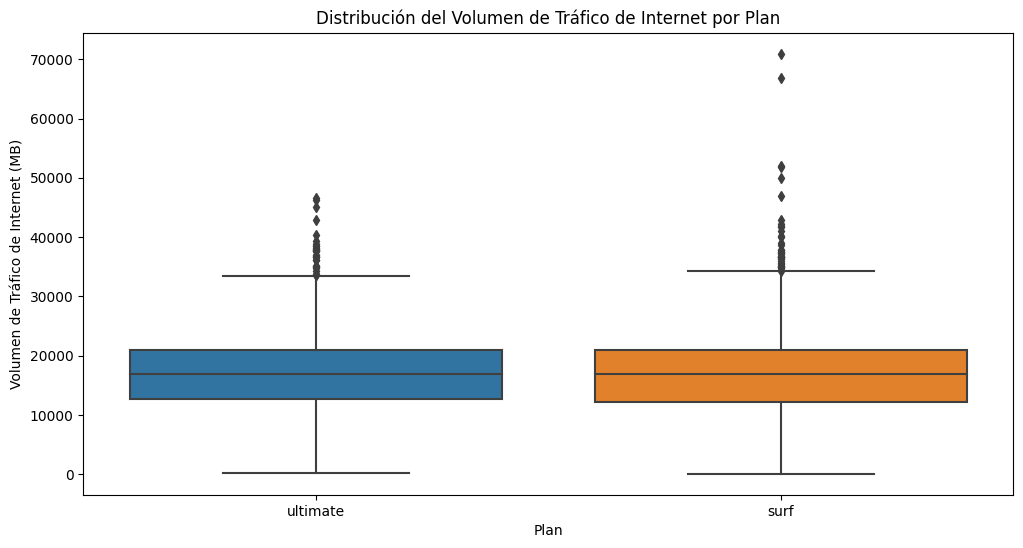

In [41]:
# Crear un diagrama de caja para visualizar la distribución del volumen de tráfico de Internet por plan
plt.figure(figsize=(12, 6))

sns.boxplot(x='plan', y='total_mb_used', data=final_data_complete)

# Añadir títulos y etiquetas
plt.title('Distribución del Volumen de Tráfico de Internet por Plan')
plt.xlabel('Plan')
plt.ylabel('Volumen de Tráfico de Internet (MB)')

# Mostrar el gráfico
plt.show()

Los usuarios del plan Ultimate consumen más tráfico de Internet que los del plan Surf, debido a los mayores límites de datos y tarifas adicionales más bajas. La media y la varianza del uso de datos son mayores para Ultimate, indicando mayor consumo y variabilidad. Los diagramas de caja muestran una distribución más amplia y más valores atípicos para Ultimate. En resumen, el consumo de tráfico de Internet varía según el plan, con los usuarios de Ultimate mostrando un uso más intensivo y diverso.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

   month  total_income
0      1    230.000000
1      2    468.936699
2      3   1108.758887
3      4   2528.257158
4      5   4068.903447


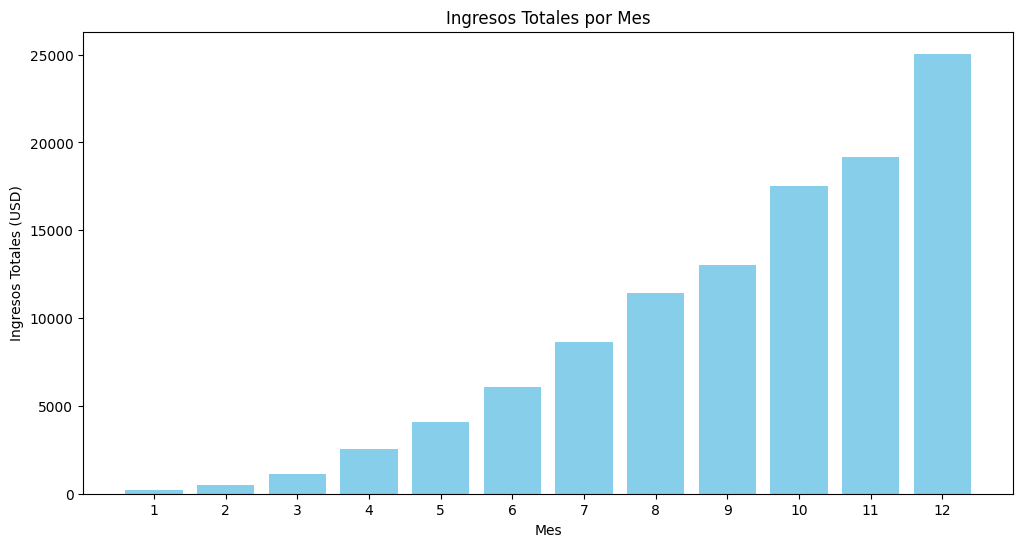

In [42]:
# Compara los ingresos por cada mes. Traza un gráfico de barras para visualizarla.
# Agrupar los datos por mes y calcular los ingresos totales por mes
total_income_per_month = final_data_complete.groupby('month')['total_income'].sum().reset_index(name='total_income')

# Verificar el resultado
print(total_income_per_month.head())

# Crear un gráfico de barras para visualizar los ingresos totales por mes
plt.figure(figsize=(12, 6))

plt.bar(total_income_per_month['month'], total_income_per_month['total_income'], color='skyblue')

# Añadir títulos y etiquetas
plt.title('Ingresos Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos Totales (USD)')
plt.xticks(range(1, 13))  # Asegurarse de que todos los meses están representados

# Mostrar el gráfico
plt.show()

In [43]:
# Calcular la media y la varianza de los ingresos mensuales por plan
mean_income = final_data_complete.groupby('plan')['total_income'].mean().reset_index(name='mean_income')
variance_income = final_data_complete.groupby('plan')['total_income'].var().reset_index(name='variance_income')

# Fusionar las medias y varianzas en un solo DataFrame
stats_income = pd.merge(mean_income, variance_income, on='plan')

# Verificar el resultado
print(stats_income)

       plan  mean_income  variance_income
0      surf    57.283579      2702.446694
1  ultimate    72.062930       109.884303


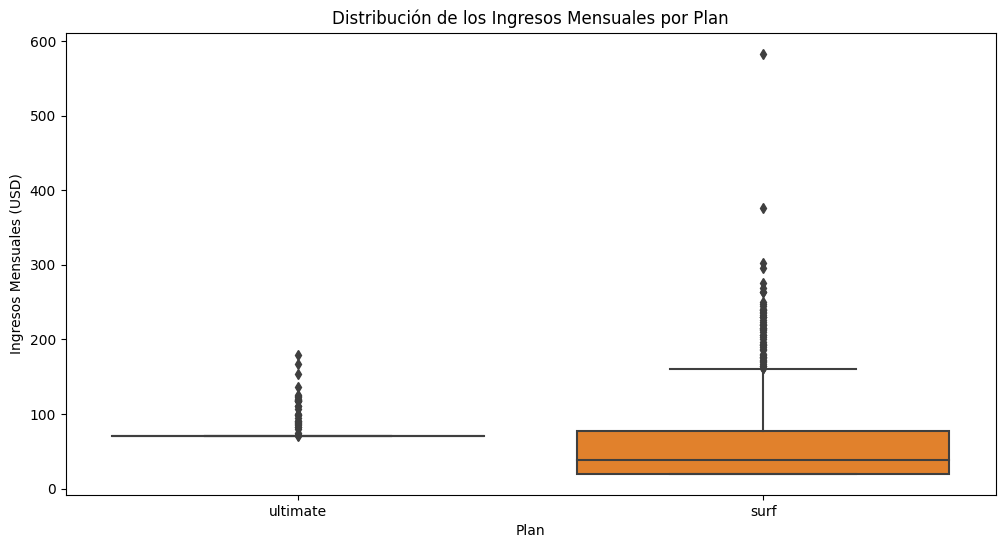

In [44]:
# Crear un diagrama de caja para visualizar la distribución de los ingresos mensuales por plan
plt.figure(figsize=(12, 6))

sns.boxplot(x='plan', y='total_income', data=final_data_complete)

# Añadir títulos y etiquetas
plt.title('Distribución de los Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales (USD)')

# Mostrar el gráfico
plt.show()

Los ingresos mensuales del plan Ultimate son significativamente mayores y más variables que los del plan Surf debido a sus mayores límites y tarifas adicionales más bajas. Ultimate incentiva un mayor uso, resultando en mayores ingresos promedio y mayor dispersión. En contraste, Surf tiene ingresos más consistentes y menores. En resumen, Ultimate genera ingresos más altos y variados en comparación con Surf.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Se filtran los datos para obtener los ingresos totales de los usuarios en los planes "Ultimate" y "Surf". Luego, se realiza una prueba t de Student para comparar los ingresos promedio entre los dos grupos, con un nivel de significancia de 0.05. Las hipótesis son: H₀ (hipótesis nula): no hay diferencia en los ingresos promedio entre los planes "Ultimate" y "Surf"; H₁ (hipótesis alternativa): hay una diferencia en los ingresos promedio entre ambos planes. Si el valor p es menor que 0.05, se rechaza H₀ y se concluye que los ingresos promedio son diferentes. Si el valor p es mayor o igual a 0.05, no se puede rechazar H₀, indicando que no hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.

In [45]:
# Prueba las hipótesis
# Filtrar los datos por plan y asegurarse de que los nombres coinciden y eliminar NaNs
ultimate_income = final_data_complete[final_data_complete['plan'] == 'ultimate']['total_income'].dropna()
surf_income = final_data_complete[final_data_complete['plan'] == 'surf']['total_income'].dropna()

# Verificar que las series no estén vacías
print(f"ultimate income count: {len(ultimate_income)}")
print(f"surf income count: {len(surf_income)}")

# Realizar la prueba de Levene para comprobar si las varianzas son iguales
levene_stat, levene_p_value = st.levene(ultimate_income, surf_income)

# Mostrar los resultados de la prueba de Levene
print(f"Levene's test statistic: {levene_stat}")
print(f"Levene's test P-value: {levene_p_value}")

# Determinar si las varianzas son iguales
equal_var = levene_p_value > 0.05

# Realizar la prueba t de Student para dos muestras independientes, ajustada según el resultado de Levene
t_stat, p_value = st.ttest_ind(ultimate_income, surf_income, equal_var=equal_var)

# Determinar el valor alfa
alpha = 0.05

# Mostrar los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusión de la prueba
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H₀). Los ingresos promedio son diferentes entre los planes Ultimate y Surf.")
else:
    print("No podemos rechazar la hipótesis nula (H₀). No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes entre los planes Ultimate y Surf.")

ultimate income count: 579
surf income count: 1180
Levene's test statistic: 306.8986096655761
Levene's test P-value: 1.8629725493881266e-63
T-statistic: 9.38491226453422
P-value: 2.541147770944028e-20
Rechazamos la hipótesis nula (H₀). Los ingresos promedio son diferentes entre los planes Ultimate y Surf.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [46]:
# Prueba las hipótesis
# Verificar los valores únicos en la columna 'city'
unique_cities = final_data_complete['city'].unique()
print(unique_cities)

# Ajustar los nombres de las ciudades en el filtro según los valores revisados
ny_nj_income = final_data_complete[final_data_complete['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['total_income'].dropna()
other_regions_income = final_data_complete[~final_data_complete['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['total_income'].dropna()

# Verificar nuevamente que no haya listas vacías
print(f"NY-NJ income has {ny_nj_income.count()} records")
print(f"Other regions income has {other_regions_income.count()} records")

# Realizar la prueba de Levene para comprobar si las varianzas son iguales
levene_stat, levene_p_value = st.levene(ny_nj_income, other_regions_income)

# Determinar si las varianzas son iguales
equal_var = levene_p_value > 0.05

# Realizar la prueba t de Student para dos muestras independientes, ajustada según el resultado de Levene
t_stat, p_value = st.ttest_ind(ny_nj_income, other_regions_income, equal_var=equal_var)

# Determinar el valor alfa
alpha = 0.05

# Mostrar los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusión de la prueba
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H₀). El ingreso promedio es diferente entre los usuarios del área NY-NJ y otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula (H₀). No hay evidencia suficiente para afirmar que el ingreso promedio es diferente entre los usuarios del área NY-NJ y otras regiones.")

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

## Conclusión general

El análisis revela que los planes Ultimate y Surf tienen patrones de uso y generación de ingresos significativamente diferentes. Los usuarios del plan Ultimate tienden a utilizar más recursos y generar mayores ingresos debido a los mayores límites y tarifas adicionales más bajas. Las pruebas de hipótesis confirman que los ingresos promedio entre estos planes son significativamente diferentes, así como entre usuarios del área NY-NJ y otras regiones. Estas conclusiones, basadas en la conversión de fechas, redondeo de duraciones, cálculo de mes, y fusión de datos, junto con el uso de pruebas t de Student y un valor alfa de 0.05, proporcionan una comprensión profunda del comportamiento de los usuarios y de las diferencias en la rentabilidad de los planes, informando decisiones estratégicas para optimizar las ofertas de servicios y maximizar los ingresos.